In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_excel('retail.xlsx',sheet_name='Online Retail')

### information 
data.head() gives the overview of dataset

In [3]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### data types
data.info() gives the information about the columns value and data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


### shape of data
data.shape gives the no of rows and no of columns of dataset

In [5]:
data.shape

(541909, 8)

In [6]:
print("Number of rows in dataset is: ", data.shape[0])
print("Number of columns in dataset is: ", data.shape[1])

Number of rows in dataset is:  541909
Number of columns in dataset is:  8


### calculating percentage of missing value
data.count() shows the total no of value present in dataset
data.isnull().sum() gives the number of missing value in each column
data.isnull().sum()/data.count() gives the percentage of missing value

In [7]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
data.isnull().sum()/data.count()

InvoiceNo      0.000000
StockCode      0.000000
Description    0.002690
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.332031
Country        0.000000
dtype: float64

### deleting duplacated data
data=data.drop_duplicates(subset=None, keep=False, inplace=False)
provides the data frame after deleting the duplicated data i.e more then 10,000 rows was dpulicated and they are deleted

In [9]:
data=data.drop_duplicates(subset=None, keep=False, inplace=False)
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


### FILL NULL VALUE
as there is only significant missing value missing on description so it's not necessary to fill the description column for customer ID number we cannot randomly put customer id no so i think its not feasible but if we want to fill the null value on data then below are simple 2 technique we can use

data=data.coloum.fillna("value") fill the null column with given value

data=data.coloum.fillna(data.coloum.mean()) fill the null column with mean value

### InvoiceDate Normalized
here, i just seperated the date format in months day a year and hour as it provides the clear visualization of data 
i.e we can analyze the data in day month year and hour also.

In [10]:
data['month'] = data['InvoiceDate'].dt.month
data['year'] = data['InvoiceDate'].dt.year

In [11]:
data['WeekDay'] = data['InvoiceDate'].dt.day_name()

In [12]:
data['month_year'] = pd.to_datetime(data[['year', 'month']].assign(Day=1))

In [13]:

data['hour'] = data['InvoiceDate'].dt.hour

In [14]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,Friday,2011-12-01,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,Friday,2011-12-01,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,Friday,2011-12-01,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,Friday,2011-12-01,12


### changing data types
as, while viewing every column are in perfect data types but if we want to convert then we can use below syntax
this syntax can be used to change datatime64 datatype if it is in object datatype
\n data['InvoiceDate']=data['InvoiceDate'].astype('datetime64')
\n data.dtypes

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531762 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531762 non-null  object        
 1   StockCode    531762 non-null  object        
 2   Description  530308 non-null  object        
 3   Quantity     531762 non-null  int64         
 4   InvoiceDate  531762 non-null  datetime64[ns]
 5   UnitPrice    531762 non-null  float64       
 6   CustomerID   396767 non-null  float64       
 7   Country      531762 non-null  object        
 8   month        531762 non-null  int64         
 9   year         531762 non-null  int64         
 10  WeekDay      531762 non-null  object        
 11  month_year   531762 non-null  datetime64[ns]
 12  hour         531762 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(4), object(5)
memory usage: 56.8+ MB


### adding column 
adding 'sum price 'column which gives the sum of totalsales product items

In [16]:
data['sumprice'] = data['UnitPrice'] * data['Quantity']


### deleting the cancel transaction
here, i just view the no. of rows that start with 'c'

In [17]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour,sumprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34


In [18]:
cancelled_transaction= data[data['InvoiceNo'].astype(str).str.contains('C')]
cancelled_transaction.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour,sumprice
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,12,2010,Wednesday,2010-12-01,9,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,12,2010,Wednesday,2010-12-01,9,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,12,2010,Wednesday,2010-12-01,10,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,Wednesday,2010-12-01,10,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,12,2010,Wednesday,2010-12-01,10,-6.96


In [19]:
#no of positive quantity in cancel transaction
cancelled_transaction[cancelled_transaction['Quantity']>0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour,sumprice


In [20]:
#some negetive transaction doesn't falls on calceled transaction
print("Number of cancelled transactions:", len(cancelled_transaction))
print("Number of transaction with negative quantity:", data[data['Quantity'] <= 0 ]['Quantity'].count())

Number of cancelled transactions: 9219
Number of transaction with negative quantity: 10555


In [21]:
#some transaction with 0.0 unit price
data[data['UnitPrice'] == 0].head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour,sumprice
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,12,2010,Wednesday,2010-12-01,11,0.0
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,12,2010,Wednesday,2010-12-01,14,0.0
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,12,2010,Wednesday,2010-12-01,14,0.0
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom,12,2010,Wednesday,2010-12-01,14,0.0
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom,12,2010,Wednesday,2010-12-01,14,0.0


In [22]:
print("Number of transaction with 0.0 unit price",data[data['UnitPrice'] == 0]['UnitPrice'].count())

Number of transaction with 0.0 unit price 2505


In [23]:
data = data[(data['UnitPrice'] > 0) & (data['Quantity']>0)]

### information after deleting:

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520036 entries, 0 to 541908
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    520036 non-null  object        
 1   StockCode    520036 non-null  object        
 2   Description  520036 non-null  object        
 3   Quantity     520036 non-null  int64         
 4   InvoiceDate  520036 non-null  datetime64[ns]
 5   UnitPrice    520036 non-null  float64       
 6   CustomerID   387883 non-null  float64       
 7   Country      520036 non-null  object        
 8   month        520036 non-null  int64         
 9   year         520036 non-null  int64         
 10  WeekDay      520036 non-null  object        
 11  month_year   520036 non-null  datetime64[ns]
 12  hour         520036 non-null  int64         
 13  sumprice     520036 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(4), object(5)
memory usage: 59.5+ MB


### total price for each products
data.groupby(by='Description')['sumprice'].sum().plot(kind='bar') we can use this statement if the data can be visible in bargraph

In [25]:
data.groupby(by='Description')['sumprice'].sum()

Description
 4 PURPLE FLOCK DINNER CANDLES       280.60
 50'S CHRISTMAS GIFT BAG LARGE      2343.63
 DOLLY GIRL BEAKER                  2881.25
 I LOVE LONDON MINI BACKPACK        1619.87
 I LOVE LONDON MINI RUCKSACK           4.15
                                     ...   
ZINC T-LIGHT HOLDER STARS SMALL     4197.83
ZINC TOP  2 DOOR WOODEN SHELF        270.08
ZINC WILLIE WINKIE  CANDLE STICK    2711.85
ZINC WIRE KITCHEN ORGANISER          239.97
ZINC WIRE SWEETHEART LETTER TRAY     275.62
Name: sumprice, Length: 4026, dtype: float64

### total quantity for each product

In [26]:
data.groupby(by='Description')['Quantity'].sum()

Description
 4 PURPLE FLOCK DINNER CANDLES       140
 50'S CHRISTMAS GIFT BAG LARGE      1915
 DOLLY GIRL BEAKER                  2447
 I LOVE LONDON MINI BACKPACK         387
 I LOVE LONDON MINI RUCKSACK           1
                                    ... 
ZINC T-LIGHT HOLDER STARS SMALL     5089
ZINC TOP  2 DOOR WOODEN SHELF         13
ZINC WILLIE WINKIE  CANDLE STICK    2932
ZINC WIRE KITCHEN ORGANISER           30
ZINC WIRE SWEETHEART LETTER TRAY      83
Name: Quantity, Length: 4026, dtype: int64

In [27]:
data.groupby(by='Description')['CustomerID'].unique()

Description
 4 PURPLE FLOCK DINNER CANDLES      [15012.0, 18055.0, nan, 15464.0, 17075.0, 1784...
 50'S CHRISTMAS GIFT BAG LARGE      [15150.0, nan, 12621.0, 16145.0, 18196.0, 1529...
 DOLLY GIRL BEAKER                  [nan, 13230.0, 14796.0, 17841.0, 12397.0, 1586...
 I LOVE LONDON MINI BACKPACK        [14508.0, 17864.0, 17841.0, 15529.0, 14646.0, ...
 I LOVE LONDON MINI RUCKSACK                                                [14646.0]
                                                          ...                        
ZINC T-LIGHT HOLDER STARS SMALL     [16133.0, 14189.0, 14562.0, 13668.0, 15237.0, ...
ZINC TOP  2 DOOR WOODEN SHELF       [14217.0, nan, 15271.0, 13842.0, 14606.0, 1477...
ZINC WILLIE WINKIE  CANDLE STICK    [15311.0, nan, 14741.0, 15574.0, 17961.0, 1632...
ZINC WIRE KITCHEN ORGANISER         [17646.0, nan, 17706.0, 16984.0, 16033.0, 1471...
ZINC WIRE SWEETHEART LETTER TRAY    [16750.0, 13209.0, 14298.0, nan, 13405.0, 1784...
Name: CustomerID, Length: 4026, dtype: obj

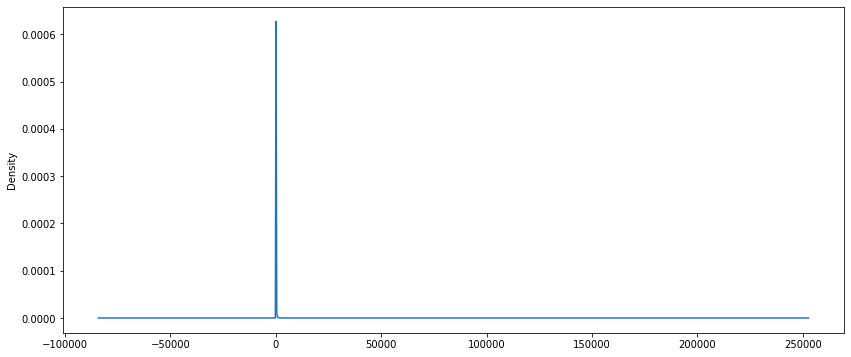

In [32]:
data['sumprice'].plot(kind='density',figsize=(14,6))

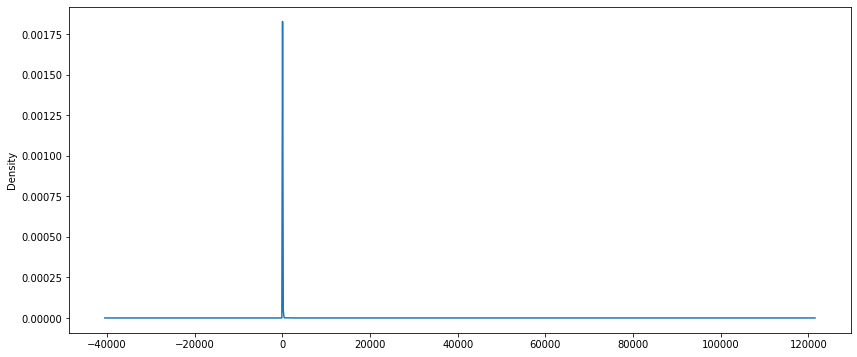

In [33]:
data['Quantity'].plot(kind='density',figsize=(14,6))

### visualization of sumprice with month

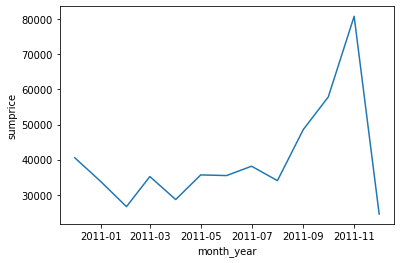

In [28]:
plot = pd.DataFrame(data.groupby(['month_year'])['sumprice'].count()).reset_index()
ax = sns.lineplot(x="month_year", y="sumprice", data = plot)

### visualization of quantity with month_year

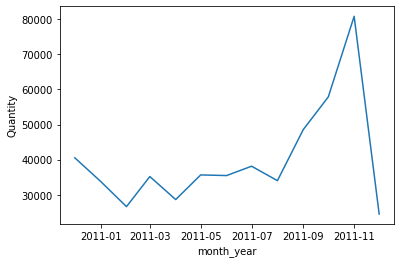

In [29]:
plot1 = pd.DataFrame(data.groupby(['month_year'])['Quantity'].count()).reset_index()
ax = sns.lineplot(x="month_year", y="Quantity", data = plot1)

### visualization quantity as, x-axis and sumprice as y-axis

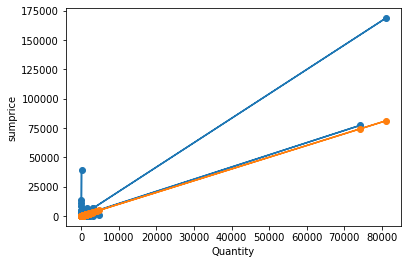

In [30]:
fig,ax=plt.subplots()
ax.plot(data.Quantity, data.sumprice, marker="o")
ax.set_xlabel("Quantity")
ax.set_ylabel("sumprice")
ax.plot(data.Quantity, data['Quantity'], marker="o")
plt.show()

In [31]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,month,year,WeekDay,month_year,hour,sumprice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,Wednesday,2010-12-01,8,20.34
